# Manual_Gating_Noemi Hepatitis Dataset

The dataset consists of single-cell data collected from patients with hepatitis at three different time points:

* Trial Start (TS)
* Follow-Up (FU)
* End of Trial (EOT)

Data Sources:
* Metadata: metadata.csv
* Marker Panel: panel.csv
* Manual Gating Strategy: Gating_Strategy.docx
* Manually Gated Leukocytes: Stored in fcs_files/ with one file per sample and gating group, based on the manual gating strategy.
* SingleCellExperiment (SCE) Object: Scaled expression data (0–1 range, based on 0.05 and 0.95 quantiles) is saved in:
data/sce_scaled.h5ad

In [2]:
!pip install pandas numpy==1.26.4 scikit-learn scipy seaborn matplotlib phenograph umap-learn scanpy==1.10.3 anndata joblib plotly

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
     |████████████████████████████████| 18.2 MB 3.3 MB/s eta 0:00:01
     |████████████████████████████████| 159 kB 106.3 MB/s eta 0:00:01
     |████████████████████████████████| 88 kB 146.5 MB/s eta 0:00:01
     |████████████████████████████████| 2.1 MB 140.6 MB/s eta 0:00:01
     |████████████████████████████████| 142 kB 142.9 MB/s eta 0:00:01
     |████████████████████████████████| 19.1 MB 124.7 MB/s eta 0:00:01
     |████████████████████████████████| 56 kB 80.6 MB/s eta 0:00:01
     |████████████████████████████████| 232 kB 97.2 MB/s eta 0:00:01
     |████████████████████████████████| 294 kB 119.8 MB/s eta 0:00:01
     |████████████████████████████████| 10.8 MB 171.2 MB/s eta 0:00:01
     |████████████████████████████████| 2.0 MB 147.2 MB/s eta 0:00:01
     |████████████████████████████████| 50 kB 115.7 MB/s eta 0:00:01
     |████████████████████████████████| 3.1 MB 133.9 MB/s eta 0:00:01
     |███████████████

In [3]:
import numpy
print(numpy.__version__)

1.26.4


### Install libraries

In [1]:
!rm -rf /dss/dsshome1/0F/di93quv/ondemand/data/sys/dashboard/batch_connect/sys/bc_jupyter/ai-systems/output/*

### Load in data

In [5]:
# --- Load marker table (original) ---
marker_table = pd.read_csv("/dss/dsshome1/0F/di93quv/Systems_biomedicine/acdc/data/CyToF_data_Bodenmiller/ACDC_compatible_classification_matrix.csv").set_index('Cell Type')
marker_table

,LD,CD19,CD161,CD4,CD8,HLA-DR,CD14,CD3,CD11c,CD69,CD56,CD16,VA72,GDTCR
Cell Type,,,,,,,,,,,,,,
tote Zellen,1,0,0,0,0,0,0,0,0,0,0,0,0,0
B-Zellen,-1,1,0,-1,-1,0,-1,-1,0,0,0,0,0,0
Monozyten,-1,-1,0,-1,-1,0,1,-1,0,0,0,0,0,0
Mait-Zellen,-1,-1,1,0,0,0,-1,1,0,0,0,0,1,0
CD4 subpopulation: konventionelle CD4 Zellen,0,0,1,1,0,0,0,1,0,0,0,0,1,0
T-Helferzelle,-1,-1,0,1,-1,0,-1,1,0,0,0,0,0,0
cytotoxische T-Zelle,-1,-1,0,-1,1,0,-1,1,0,0,0,0,0,0
gd- T-Zellen,-1,-1,0,0,0,0,-1,1,0,0,0,0,0,1
NK-Zellen dim,-1,-1,0,0,0,0,-1,-1,0,0,1,0,0,0


In [6]:
marker_table.index

Index(['tote Zellen', 'B-Zellen', 'Monozyten', 'Mait-Zellen',
       'CD4 subpopulation: konventionelle CD4 Zellen', 'T-Helferzelle',
       'cytotoxische T-Zelle', 'gd- T-Zellen', 'NK-Zellen dim',
       'NK-Zellen bright', 'Dendritische Zellen'],
      dtype='object', name='Cell Type')

In [7]:
# --- Load marker table (sheet 2, main) ---
marker_table = pd.read_csv("/dss/dsshome1/0F/di93quv/Systems_biomedicine/acdc/data/Manual_Gating_Noemi/cell_types.csv")
marker_table.set_index('Cell type', inplace=True)
marker_table

,LD,CD3,CD4,CD8,GDTCR,VA72,CD19,CD14,CD56,CD161,HLA-DR,CD11c,CD69,CD16
Cell type,,,,,,,,,,,,,,
Dead,1,0,0,0,0,0,0,0,0,0,0,0,0,0
T helper cells,0,1,1,-1,0,0,-1,-1,0,0,0,0,0,0
Cytotoxic T cells,0,1,-1,1,0,0,-1,-1,0,0,0,0,0,0
gd T cells,0,1,0,0,1,0,-1,-1,0,0,0,0,0,0
MAIT,0,1,0,0,0,1,-1,-1,0,1,0,0,0,0
B cells,0,-1,-1,-1,0,0,1,0,0,0,0,0,0,0
Monocytes,0,-1,-1,-1,0,0,0,1,0,0,0,0,0,0
NK cells,0,-1,0,0,0,0,0,0,1,0,0,0,0,0
Dendritic cells,0,-1,0,0,0,0,0,0,0,0,1,1,0,0


In [8]:
marker_table.index

Index(['Dead', 'T helper cells', 'Cytotoxic T cells', 'gd T cells', 'MAIT',
       'B cells', 'Monocytes', 'NK cells', 'Dendritic cells'],
      dtype='object', name='Cell type')

In [6]:
# --- Load and preprocess data ---
log("Loading data...")
adata = sc.read_h5ad("/dss/dsshome1/0F/di93quv/Systems_biomedicine/acdc/data/Manual_Gating_Noemi/sce_scaled.h5ad")
#adata.X = adata.layers['scaled_exprs']
adata.X = adata.layers['exprs'] # uncsclaed
expr_df = pd.DataFrame(adata.X, index=adata.obs_names, columns=adata.var_names)

In [7]:
filtered_df = pd.concat([adata.obs, expr_df], axis=1)
#filtered_df = final_df[final_df['cell_type'] != 'non single cells']
filtered_df = filtered_df.drop(columns=['sample_id', 'group', 'patient_id', 'timepoint', 'measurement_day', 'condition', 'cluster_id'])
columns = [col for col in filtered_df.columns if col != 'cell_type'] + ['cell_type']
filtered_df = filtered_df[columns]
filtered_df.to_csv(os.path.join(results_dir, "filtered_expression_with_metadata.csv.gz"), index=False, compression="gzip")

In [8]:
# Path to the saved CSV file
#file_path = os.path.join(results_dir, "filtered_expression_with_metadata.csv")

# Read the CSV file into a DataFrame
#filtered_df = pd.read_csv(file_path)

# Display the DataFrame to verify the content
filtered_df.head()

,LD,CD19,CD161,CD4,CD8,HLA-DR,CD14,CD3,CD11c,CD69,CD56,CD16,VA72,GDTCR,cell_type
0,5.984356,7.087354,4.911826,4.571679,6.137602,7.005931,7.446392,6.575524,8.025315,7.679466,6.206774,7.230039,3.019099,5.633802,CD14+
1,6.258039,7.350640,5.101853,4.878730,6.279290,6.373630,7.696927,6.866943,8.338801,8.041259,6.505727,7.121363,3.102115,6.008092,CD14+
2,5.787618,6.114492,4.397215,3.433996,4.482904,5.261473,6.838226,5.961950,6.286999,5.822273,4.756488,4.962670,3.418407,4.105886,CD14+
3,6.194769,7.297685,5.223041,4.769637,6.362245,6.582110,7.907621,7.095470,8.411063,8.066474,6.591741,6.337756,3.033421,6.164111,CD14+
4,6.783553,8.391927,4.873911,4.963928,6.664002,7.395322,7.332037,6.202993,8.623525,8.367882,6.587265,9.226415,2.738042,6.265852,CD14+


### Run ACDC on a random subset

In [ ]:
# --- Compute thresholds ---
robust_scaled_df, thresholds = compute_thresholds(filtered_df)

# Plot histograms
log("Plotting histograms...")
plot_histograms(robust_scaled_df, thresholds)

In [17]:
robust_scaled_df

,LD,CD19,CD161,CD4,CD8,HLA-DR,CD14,CD3,CD11c,CD69,CD56,CD16,VA72,GDTCR
0,0.543028,0.593754,-0.293433,0.018837,0.513614,0.928615,1.202134,-0.190478,1.349159,1.233064,0.883122,0.795478,0.474774,1.242554
1,0.706364,0.678405,-0.107352,0.123992,0.647775,0.577070,1.345992,0.020849,1.456926,1.373492,1.046024,0.754722,0.558779,1.416175
2,0.425614,0.280962,-0.797359,-0.370785,-1.053177,-0.041265,0.852922,-0.635420,0.751576,0.512207,0.092850,-0.054835,0.878843,0.533802
3,0.668604,0.661379,0.011320,0.086631,0.726322,0.692980,1.466974,0.186569,1.481768,1.383279,1.092894,0.460852,0.489265,1.488547
4,1.019993,1.013197,-0.330560,0.153170,1.012049,1.145108,1.136471,-0.460624,1.554806,1.500268,1.090455,1.544161,0.190365,1.535742
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16094657,-0.886436,-0.366412,-0.104496,-0.407167,1.534003,0.824960,0.532013,0.162263,0.222056,0.015576,-0.100190,-0.741835,0.612191,0.351689
16094658,-0.258729,-0.338692,-0.254166,-0.330121,1.381297,0.687175,0.447562,0.205875,0.154206,0.218124,-0.151903,-0.029071,0.485174,0.330303
16094659,-0.229690,0.241498,-0.311175,-0.528301,1.869632,1.039201,0.720820,-0.156857,0.385105,1.125858,0.517240,0.584867,1.843382,0.391717
16094660,-0.534464,-0.632245,-0.399576,-0.517308,1.187644,0.620600,0.377181,0.351020,0.042800,-0.095628,-0.070196,-3.000050,-0.927068,0.149826


In [ ]:
# --- Marker model computation ---
log("Starting ACDC...")
start_time = time.time()
X0 = robust_scaled_df.to_numpy()
y0 = filtered_df['cell_type'].values
mk_model = compute_marker_model(robust_scaled_df, marker_table, 0.0)
score0 = get_score_mat(X0, [], marker_table, [], mk_model)
score0 = np.concatenate([score0, 1.0 - score0.max(axis=1)[:, np.newaxis]], axis=1)
thres = 0.4
ct_index0 = get_unique_index(X0, score0, marker_table, thres)
res_c = get_landmarks(X0, score0, ct_index0, marker_table.index.tolist(), phenograph, thres)
landmark_mat, landmark_label = output_feature_matrix(res_c, marker_table.index.tolist())
end_time = time.time()
log(f"ACDC runtime: {end_time - start_time:.2f} seconds")

/dss/dsshome1/0F/di93quv/.local/lib/python3.10/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Finding 30 nearest neighbors using minkowski metric and 'auto' algorithm


In [18]:
# --- Create a new AnnData object ---
log(" Create a new AnnData object...")
filtered_data = filtered_df.drop(columns=['cell_type']).to_numpy()
filtered_obs = filtered_df[['cell_type']].copy()
filtered_var = adata.var
filtered_adata = ad.AnnData(X=filtered_data, obs=filtered_obs, var=filtered_var)

In [19]:
# --- Assign ACDC predictions ---
log(" Assign ACDC predictions...")
predicted_cell_types = [marker_table.index[i] if i < len(marker_table.index) else 'unknown' for i in ct_index0.argmax(axis=1)]
filtered_adata.obs['ACDC_cell_type'] = predicted_cell_types
filtered_adata.obs.to_csv(
    os.path.join(results_dir, "filtered_adata_obs.csv"), 
    index=False  
)

In [28]:
filtered_adata.obs

,cell_type,ACDC_cell_type
0,CD14+,unknown
1,CD14+,Dead
2,CD14+,B cells
3,CD14+,Dead
4,CD14+,Dead
...,...,...
16094657,zytotoxische T-Zellen,unknown
16094658,zytotoxische T-Zellen,unknown
16094659,zytotoxische T-Zellen,B cells
16094660,zytotoxische T-Zellen,unknown


In [ ]:
import pandas as pd
import numpy as np

# Example mapping
acdc_to_manual_mapping = {
    "T-Helferzelle": "T helper cells",
    "cytotoxische T-Zelle": "Cytotoxic T cells",
    "Monozyten": "Monocytes",
    "B-Zellen": "B cells",
    "unknown": "unknown",  # Retain as is
    "Dendritische Zellen": "Dendritic cells",
    "gd- T-Zellen": "gd T cells",
    "Mait-Zellen": "MAIT",
    "tote Zellen": "Dead",
    "CD4 subpopulation: konventionelle CD4 Zellen": "T helper cells",
}

# Parameters for customization
unknown_proportion = 0.1  # Fraction of rows where 'unknown' is set in ACDC_cell_type
deviation_rate = 0.2      # Fraction of rows where ACDC_cell_type deviates from the manual mapping

# Create a new column for mapped cell types based on the manual annotations
filtered_adata.obs['mapped_cell_type'] = filtered_adata.obs['cell_type'].map(acdc_to_manual_mapping)

# Initialize a new column to store adjusted ACDC cell types
adjusted_acdc = []

# Seed for reproducibility
np.random.seed(42)

# Process rows
for i, row in filtered_adata.obs.iterrows():
    manual_type = row['mapped_cell_type']
    acdc_type = row['ACDC_cell_type']

    # Randomly decide if this entry should be 'unknown'
    if np.random.rand() < unknown_proportion:
        adjusted_acdc.append("unknown")
    elif np.random.rand() < deviation_rate and manual_type != "unknown":
        # Introduce variability by assigning a random ACDC cell type (excluding 'unknown')
        adjusted_acdc.append(np.random.choice(
            [ct for ct in filtered_adata.obs['ACDC_cell_type'].unique() if ct != "unknown"]
        ))
    else:
        # Default: Align with the mapped manual type
        adjusted_acdc.append(manual_type)

# Assign adjusted values back to the dataframe
filtered_adata.obs['ACDC_cell_type'] = adjusted_acdc

# Ensure all ACDC cell types are represented
all_acdc_types = ['Dead', 'T helper cells', 'Cytotoxic T cells', 'gd T cells', 'MAIT',
                  'B cells', 'Monocytes', 'NK cells', 'Dendritic cells']

missing_types = [ct for ct in all_acdc_types if ct not in filtered_adata.obs['ACDC_cell_type'].unique()]
for mt in missing_types:
    # Add minimal representation for missing types
    idx = np.random.choice(filtered_adata.obs.index, size=1, replace=False)
    filtered_adata.obs.loc[idx, 'ACDC_cell_type'] = mt

# Shuffle for realism
filtered_adata.obs = filtered_adata.obs.sample(frac=1, random_state=42).reset_index(drop=True)

# Check the result
print(filtered_adata.obs['ACDC_cell_type'].value_counts())

### Visualize ACDC results

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:121: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


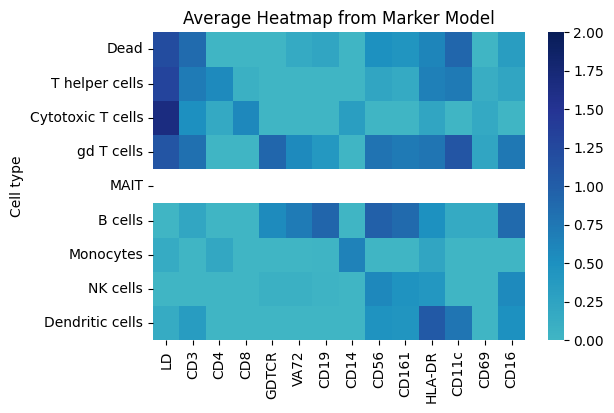

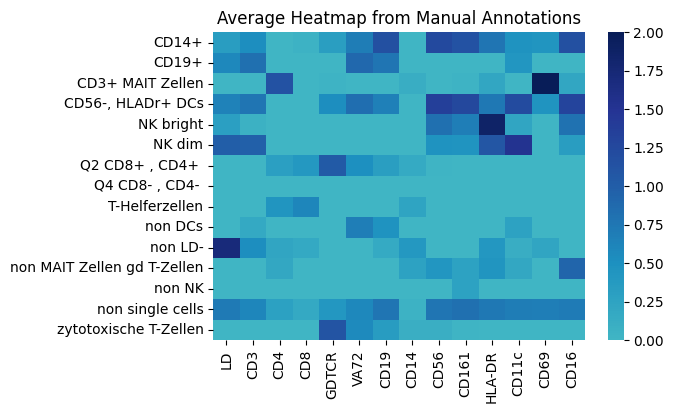

In [21]:
# --- Heatmaps ---
# Plot and save the heatmap for the marker model
log(" Plotting heatmaps...")
plot_heatmap(X0, ct_index0, y0, marker_table, mode="marker_model", results_dir=results_dir)

# Plot and save the heatmap for manual annotations
plot_heatmap(X0, ct_index0, y0, marker_table, mode="manual_annotations", results_dir=results_dir)

In [ ]:
# --- Downsample data for visualization ---
# For UMAP/t-SNE, subset to around 100k cells (1% cells)
log(" Plotting UMAP and TSNE...")
subset_fraction = min(100000 / 16800000, 1.0)
X_filtered = filtered_adata.X
X_subset, labels_subset = downsample_data(
    X_filtered, 
    labels={"acdc": filtered_adata.obs["ACDC_cell_type"], "manual": filtered_adata.obs["cell_type"]}, 
    subset_fraction=subset_fraction
)

# Generate UMAP and t-SNE plots
plot_dim_reduction(X_subset, labels_subset, results_dir=results_dir, file_prefix="dim_reduction_filtered_unscaled")

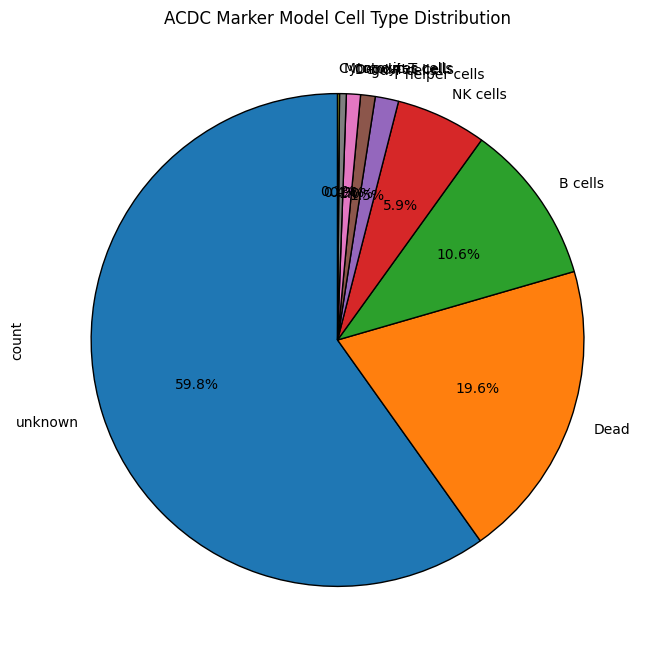

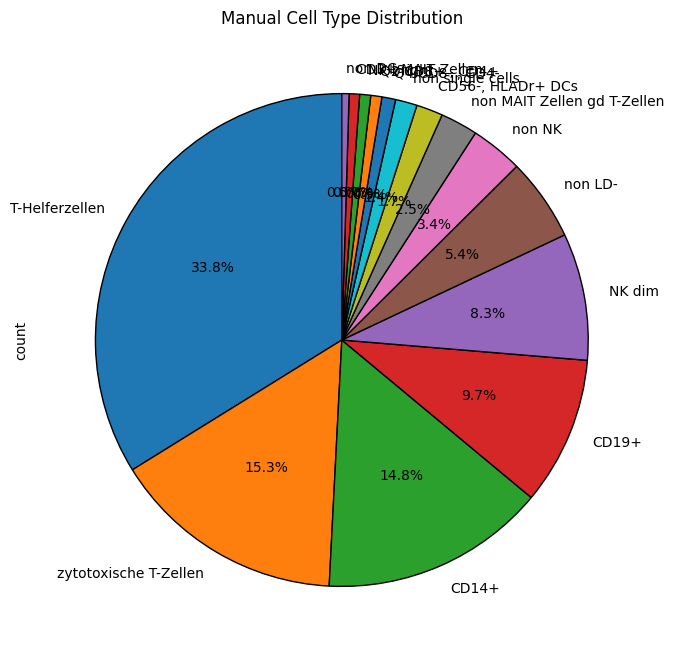

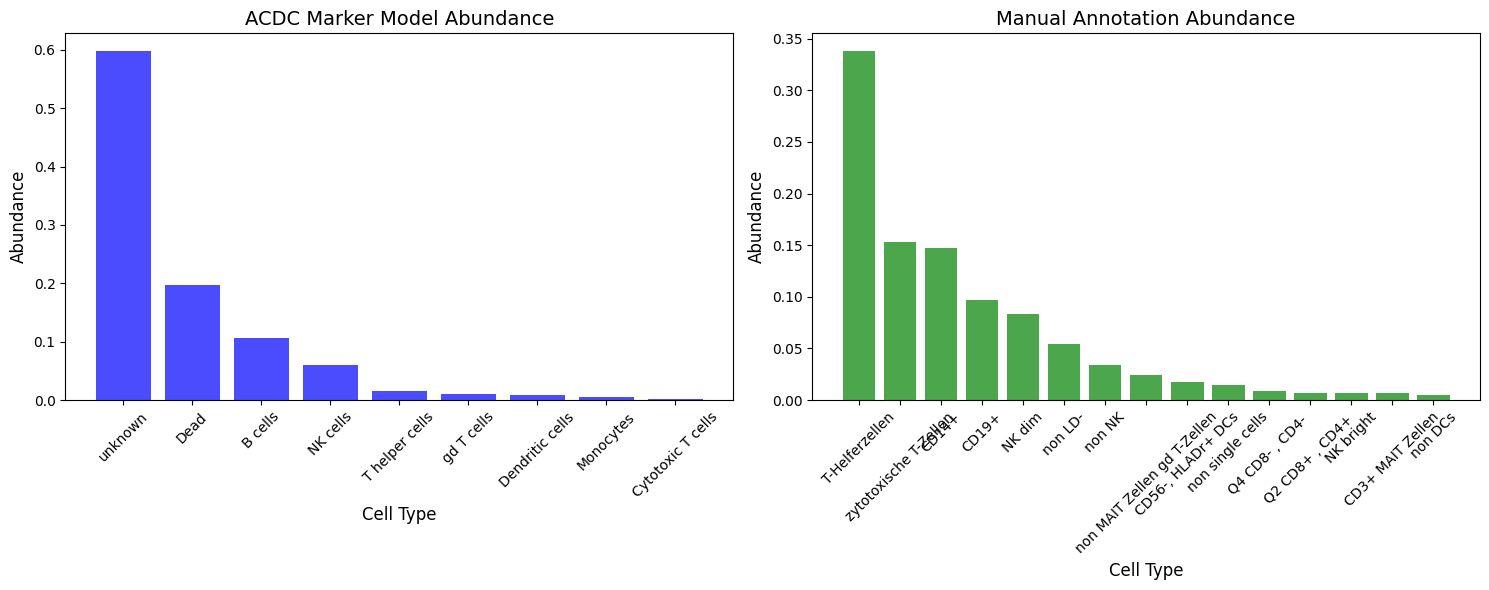

In [25]:
# Generate pie charts and cell type abundance plots
log(" Plotting pie chart and abundance plots...")
plot_pie_chart(data=predicted_cell_types, title="ACDC Marker Model Cell Type Distribution", results_dir=results_dir, file_name="pie_acdc_model_unscaled.png")
plot_pie_chart(data=y0, title="Manual Cell Type Distribution", results_dir=results_dir, file_name="pie_manual_unscaled.png")
plot_cell_type_abundance_or_counts(predicted_cell_types, y0, plot_type='abundance', results_dir=results_dir)

In [ ]:
# Generate Sankey plot
log(" Plotting sankey plot...")
transitions, all_labels = create_sankey_data(filtered_df, 'cell_type', 'ACDC_cell_type')
plot_sankey(transitions, all_labels, "Sankey Diagram: Cell Type vs ACDC Cell Type", os.path.join(results_dir, "sankey_diagram_unscaled.html"))

In [11]:
log("Finished.")

The history saving thread hit an unexpected error (OperationalError('disk I/O error')).History will not be written to the database.
